In [7]:
# Необхідні бібліотеки.
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

%matplotlib inline

# Встановлення випадкового початкового числа для відтворюваності
torch.manual_seed(42)

# Перетворення зображення в числа.
transform = transforms.ToTensor()

# Завантаження тренувального та тестового датасетів.
train_data = datasets.MNIST(root='C:/Users/Admin/Downloads/Lesson 54', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='C:/Users/Admin/Downloads/Lesson 54', train=False, download=False, transform=transform)
train_data
test_data

100%|██████████| 9912422/9912422 [00:00<00:00, 177168972.39it/s]

Extracting C:/Users/Admin/Downloads/Lesson 54/MNIST/raw/train-images-idx3-ubyte.gz to C:/Users/Admin/Downloads/Lesson 54/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 61272480.44it/s]


Extracting C:/Users/Admin/Downloads/Lesson 54/MNIST/raw/train-labels-idx1-ubyte.gz to C:/Users/Admin/Downloads/Lesson 54/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 137266367.56it/s]

Extracting C:/Users/Admin/Downloads/Lesson 54/MNIST/raw/t10k-images-idx3-ubyte.gz to C:/Users/Admin/Downloads/Lesson 54/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14132439.74it/s]

Extracting C:/Users/Admin/Downloads/Lesson 54/MNIST/raw/t10k-labels-idx1-ubyte.gz to C:/Users/Admin/Downloads/Lesson 54/MNIST/raw



Dataset MNIST
    Number of datapoints: 10000
    Root location: C:/Users/Admin/Downloads/Lesson 54
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
# Створення завантажувача даних для тренувального датасету.
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Створення завантажувача даних для тестового датасету.
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [9]:
# Параметри моделі.
input_size = 784
hidden_sizes = [120, 84]
output_size = 10

# Створення класу для нейромережі.
class Classification(nn.Module):
    def __init__(self):
        super(Classification, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
# Створення об'єкту нейромережі.
model = Classification()

# Ініціалізація функції помилки та оптимізатора.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
for images, labels in train_loader:
    print('BEFORE [Initial data shape]:', images.size())
    break
print('AFTER [Data after reshaping]:', images.view(100, -1).size())

BEFORE [Initial data shape]: torch.Size([100, 1, 28, 28])
AFTER [Data after reshaping]: torch.Size([100, 784])


Епоха: 1/10, Помилка тренування: 0.3864, Точність тренування: 0.8913, Помилка тестування: 0.1863, Точність тестування: 0.9457
Епоха: 2/10, Помилка тренування: 0.1566, Точність тренування: 0.9539, Помилка тестування: 0.1237, Точність тестування: 0.9634
Епоха: 3/10, Помилка тренування: 0.1063, Точність тренування: 0.9683, Помилка тестування: 0.0988, Точність тестування: 0.9695
Епоха: 4/10, Помилка тренування: 0.0792, Точність тренування: 0.9760, Помилка тестування: 0.0979, Точність тестування: 0.9690
Епоха: 5/10, Помилка тренування: 0.0619, Точність тренування: 0.9805, Помилка тестування: 0.0782, Точність тестування: 0.9747
Епоха: 6/10, Помилка тренування: 0.0494, Точність тренування: 0.9849, Помилка тестування: 0.0819, Точність тестування: 0.9734
Епоха: 7/10, Помилка тренування: 0.0392, Точність тренування: 0.9879, Помилка тестування: 0.0789, Точність тестування: 0.9752
Епоха: 8/10, Помилка тренування: 0.0340, Точність тренування: 0.9886, Помилка тестування: 0.0768, Точність тестування:

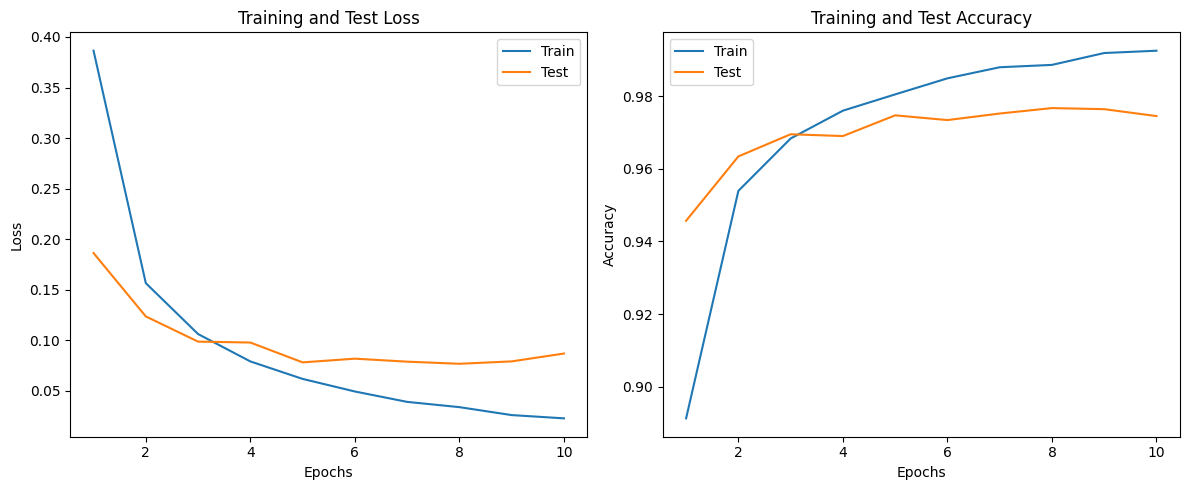

In [12]:
# Тренування моделі.
epochs = 10
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(epochs):
    train_loss = 0.0
    train_accuracy = 0.0

    # Проходження по тренувальним пакетам.
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(output.data, 1)
        train_accuracy += (predicted == labels).sum().item()
        train_loss += loss.item()

    train_accuracy /= len(train_data)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)

    # Оцінка моделі на тестових даних.
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        test_accuracy = 0.0
        for images, labels in test_loader:
            output = model(images)
            loss = criterion(output, labels)
            _, predicted = torch.max(output.data, 1)
            test_accuracy += (predicted == labels).sum().item()
            test_loss += loss.item()

        test_accuracy /= len(test_data)
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        test_acc.append(test_accuracy)

    # Виведення прогресу під час тренування.
    print(f'Епоха: {epoch+1}/{epochs}, Помилка тренування: {train_loss:.4f}, Точність тренування: {train_accuracy:.4f}, Помилка тестування: {test_loss:.4f}, Точність тестування: {test_accuracy:.4f}')

# Візуалізація прогресу тренування.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train')
plt.plot(range(1, epochs + 1), test_losses, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train')
plt.plot(range(1, epochs + 1), test_acc, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

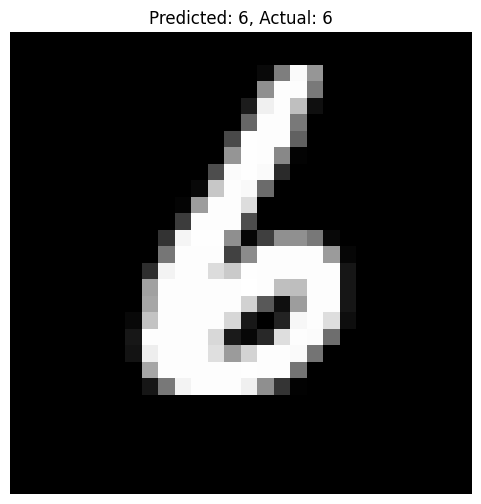

In [13]:
# Візуалізація випадкового зображення
import random

# Вибір випадкового зображення з тестового датасету
random_image_idx = random.randint(0, len(test_data)-1)
random_image, random_label = test_data[random_image_idx]

# Передача зображення через модель
model.eval()
with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    predicted_label = torch.argmax(output, dim=1).item()

# Відображення зображення та його прогнозованого мітки
plt.figure(figsize=(6, 6))
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label}, Actual: {random_label}')
plt.axis('off')
plt.show()

In [16]:
# Оновлення втрат та точності для тестових даних в кінці кожної епохи
model.eval()
test_loss = 0.0
test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        loss = criterion(output, labels)
        test_loss += loss.item()
        _, predicted_labels = torch.max(output, 1)
        test_correct += (predicted_labels == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = test_correct / len(test_data)
test_losses.append(test_loss)
test_acc.append(test_accuracy)

# Точність тестових даних для останньої епохи
print(f'Test accuracy: {test_acc[-1] * 100:.3f}%')

# Збереження та завантаження моделі
torch.save(model, 'model.pkl')
model = torch.load('model.pkl')

# Збереження тільки параметрів моделі
torch.save(model.state_dict(), 'params.pkl')
model.load_state_dict(torch.load('params.pkl'))



Test accuracy: 97.450%


<All keys matched successfully>